# Results from project 1

Task b)

In [16]:
import numpy as np
import pandas as pd
import scipy.constants as consts
import matplotlib.pyplot as plt
from io import StringIO
import os, sys
%matplotlib inline

104857.6


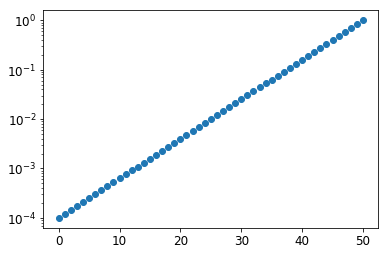

In [17]:
lo = np.logspace(-4,0, 51)
plt.semilogy(lo,'o')
print(2**20/10) 

#### Create appropriate filenames

In [18]:
def createfilename(alphas,path):
    filenames = [] 
    alpha_ = np.around(alphas,decimals = -1)
    for i in range(len(alphas)):
        filenames.append(path + str(int(alpha_[i])) + '.dat')
    return filenames

In [19]:
alphas = np.linspace(300000,700000,9)
path = 'b_n1_d1/b_n1_d1_alpha0.'

In [20]:
files = createfilename(alphas,path)

### Put everthing in a file into a dataframe with selected column names

In [21]:
def matchlist_iter(filename):
    column_names = ['energy', 'acceptance', 'timecpu','solver']
    df = pd.read_csv(filename,skiprows=5,names=column_names,delim_whitespace=True,comment='#')
    return df

##### Read in all the data into one single dataframe

In [22]:
data = []
length = len(files)
realalpha = np.linspace(0.3,0.7,9)
#indexes = list(np.linspace(0,3*length, 3*length+1))
for i in range(length):
    
   # nowindex = indexes[i:i+3]
    d = matchlist_iter(files[i])
    alphanow = np.zeros(len(['energy'])) + realalpha[i]
    d['alpha'] = pd.Series(alphanow,index=d.index)
    data.append(d)
result = pd.concat(data,ignore_index=True)
result


,energy,acceptance,timecpu,solver,alpha
0,0.571888,0.988915,3.654440,0,0.30
1,0.539968,0.989642,3.710214,1,0.30
2,0.390369,0.996718,3.684476,2,0.30
3,0.541114,0.988016,3.530099,0,0.35
4,0.544347,0.987860,3.703977,1,0.35
5,0.410811,0.996651,3.775070,2,0.35
6,0.513380,0.987309,3.622487,0,0.40
7,0.513502,0.987279,3.651494,1,0.40
8,0.439269,0.996266,3.663967,2,0.40
9,0.499456,0.987088,3.636815,0,0.45


Slicing result into solver methods

In [23]:
solver = [result[result.solver == 0],result[result.solver == 1],result[result.solver == 2]]


### Solvers

solver[0] = analytic solution  
solver[1] = numerical derivation  
solver[2] = importance sampling

In [24]:
solver[0]

,energy,acceptance,timecpu,solver,alpha
0,0.571888,0.988915,3.654440,0,0.30
3,0.541114,0.988016,3.530099,0,0.35
6,0.513380,0.987309,3.622487,0,0.40
9,0.499456,0.987088,3.636815,0,0.45
12,0.500000,0.985676,3.589127,0,0.50
15,0.507812,0.986301,3.653402,0,0.55
18,0.513756,0.984834,3.581373,0,0.60
21,0.519535,0.984289,3.739749,0,0.65
24,0.539026,0.983899,3.810217,0,0.70


In [25]:
solver[1]

,energy,acceptance,timecpu,solver,alpha
1,0.539968,0.989642,3.710214,1,0.30
4,0.544347,0.987860,3.703977,1,0.35
7,0.513502,0.987279,3.651494,1,0.40
10,0.509835,0.985998,3.768516,1,0.45
13,0.500000,0.985286,3.795014,1,0.50
16,0.504358,0.985480,3.785260,1,0.55
19,0.501131,0.983908,3.727102,1,0.60
22,0.519699,0.983897,3.861608,1,0.65
25,0.523957,0.982756,3.768564,1,0.70


In [26]:
solver[2]

,energy,acceptance,timecpu,solver,alpha
2,0.390369,0.996718,3.684476,2,0.30
5,0.410811,0.996651,3.775070,2,0.35
8,0.439269,0.996266,3.663967,2,0.40
11,0.467646,0.996058,3.752264,2,0.45
14,0.500000,0.995973,3.540494,2,0.50
17,0.532459,0.995490,3.695850,2,0.55
20,0.570595,0.995606,3.551669,2,0.60
23,0.605431,0.995295,3.604347,2,0.65
26,0.641398,0.995116,3.572266,2,0.70


In [27]:
df_colums = [f"${v}$" for v in [r"\alpha",r"\langle E_L \rangle", r"\sigma_b", r"acceptance [\%]", r"t_{CPU} [s]"]]
#df_columns = ["$n$"] + [f"${v}$" for v in [r"I_{max} [antall]", r"\theta_0 [\degree]", r"\sigma_\theta [\degree]", r"I_{0} [antall]"] ]

# Read in blocking data

In [28]:
def data_block(filename):
    column_names = ['alpha', 'sigma_an', 'sigma_num','E_mean_an', 'E_mean_num']
    df = pd.read_csv(filename,skiprows=4,names=column_names,delim_whitespace=True,comment='#')
    return df

In [29]:
block = data_block('b_n1_d1/b_n1_d1_blocking.dat')
block

,alpha,sigma_an,sigma_num,E_mean_an,E_mean_num
0,0.30,0.138140,1.179972e-01,0.571888,0.539968
1,0.35,0.071833,7.167870e-02,0.541114,0.544347
2,0.40,0.027640,2.541967e-02,0.513380,0.513502
3,0.45,0.004763,7.745090e-03,0.499456,0.509835
4,0.50,0.000000,-8.049117e-16,0.500000,0.500000
5,0.55,0.003628,4.159931e-03,0.507812,0.504357
6,0.60,0.013992,1.878866e-02,0.513756,0.501131
7,0.65,0.036136,2.953130e-02,0.519535,0.519699
8,0.70,0.050862,5.499213e-02,0.539025,0.523957


#### Analytical data

In [30]:
a = solver[0]
#reset index 

a = a.reset_index(drop=True)
analytic = pd.concat([block[['alpha','E_mean_an','sigma_an']],a[['acceptance','timecpu']]],axis=1)
analytic

,alpha,E_mean_an,sigma_an,acceptance,timecpu
0,0.30,0.571888,0.138140,0.988915,3.654440
1,0.35,0.541114,0.071833,0.988016,3.530099
2,0.40,0.513380,0.027640,0.987309,3.622487
3,0.45,0.499456,0.004763,0.987088,3.636815
4,0.50,0.500000,0.000000,0.985676,3.589127
5,0.55,0.507812,0.003628,0.986301,3.653402
6,0.60,0.513756,0.013992,0.984834,3.581373
7,0.65,0.519535,0.036136,0.984289,3.739749
8,0.70,0.539025,0.050862,0.983899,3.810217


#### Numerical data

In [31]:
n = solver[0]
n = n.reset_index(drop=True)
numerical = pd.concat([block[['alpha','E_mean_num','sigma_num']],n[['acceptance','timecpu']]],axis=1)
numerical

,alpha,E_mean_num,sigma_num,acceptance,timecpu
0,0.30,0.539968,1.179972e-01,0.988915,3.654440
1,0.35,0.544347,7.167870e-02,0.988016,3.530099
2,0.40,0.513502,2.541967e-02,0.987309,3.622487
3,0.45,0.509835,7.745090e-03,0.987088,3.636815
4,0.50,0.500000,-8.049117e-16,0.985676,3.589127
5,0.55,0.504357,4.159931e-03,0.986301,3.653402
6,0.60,0.501131,1.878866e-02,0.984834,3.581373
7,0.65,0.519699,2.953130e-02,0.984289,3.739749
8,0.70,0.523957,5.499213e-02,0.983899,3.810217


## Tables to latex format

In [32]:
df_columns = [f"${v}$" for v in [r"\alpha",r"\langle E_L \rangle", r"\sigma_b", r"\text{acceptance } [\%]", r"t_{CPU} [s]"]]

In [33]:
def latex(df,colname):
    df = df.rename(columns=dict(zip(df, colname)))
    table = df.to_latex(index=False,escape=False,column_format=(1+ len(colname))*'c')
    table = table.replace("toprule", "hline \hline")
    table = table.replace("bottomrule", "hline \hline")
    table = table.replace("midrule", "hline")
    s = r'''\begin{table}[H]
    \centering
    \caption{}
    \label{tab:}
    '''
    table = s + table 
    table = table +'\end{table}'
    return table

In [34]:
t = latex(analytic,df_columns)
print(t)

\begin{table}[H]
    \centering
    \caption{}
    \label{tab:}
    \begin{tabular}{cccccc}
\hline \hline
 $\alpha$ &  $\langle E_L \rangle$ &  $\sigma_b$ &  $\text{acceptance } [\%]$ &  $t_{CPU} [s]$ \\
\hline
     0.30 &               0.571888 &    0.138140 &                   0.988915 &       3.654440 \\
     0.35 &               0.541114 &    0.071833 &                   0.988016 &       3.530099 \\
     0.40 &               0.513380 &    0.027640 &                   0.987309 &       3.622487 \\
     0.45 &               0.499456 &    0.004763 &                   0.987088 &       3.636815 \\
     0.50 &               0.500000 &    0.000000 &                   0.985676 &       3.589127 \\
     0.55 &               0.507812 &    0.003628 &                   0.986301 &       3.653402 \\
     0.60 &               0.513756 &    0.013992 &                   0.984834 &       3.581373 \\
     0.65 &               0.519535 &    0.036136 &                   0.984289 &       3.739749 \\
     

In [35]:
l = latex(numerical, df_columns)
print(l)

\begin{table}[H]
    \centering
    \caption{}
    \label{tab:}
    \begin{tabular}{cccccc}
\hline \hline
 $\alpha$ &  $\langle E_L \rangle$ &    $\sigma_b$ &  $\text{acceptance } [\%]$ &  $t_{CPU} [s]$ \\
\hline
     0.30 &               0.539968 &  1.179972e-01 &                   0.988915 &       3.654440 \\
     0.35 &               0.544347 &  7.167870e-02 &                   0.988016 &       3.530099 \\
     0.40 &               0.513502 &  2.541967e-02 &                   0.987309 &       3.622487 \\
     0.45 &               0.509835 &  7.745090e-03 &                   0.987088 &       3.636815 \\
     0.50 &               0.500000 & -8.049117e-16 &                   0.985676 &       3.589127 \\
     0.55 &               0.504357 &  4.159931e-03 &                   0.986301 &       3.653402 \\
     0.60 &               0.501131 &  1.878866e-02 &                   0.984834 &       3.581373 \\
     0.65 &               0.519699 &  2.953130e-02 &                   0.984289 &      

Text(0.5,0,'$\\alpha$')

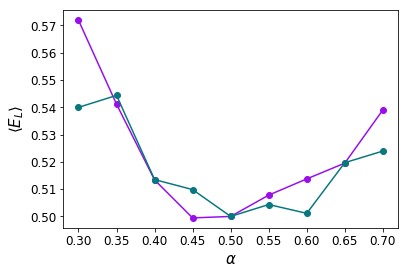

In [36]:

plt.plot(analytic['alpha'],analytic['E_mean_an'],'o-',color='xkcd:violet')
plt.plot(numerical['alpha'],numerical['E_mean_num'],'o-', color='xkcd:deep aqua')
plt.ylabel(r'$\langle E_L \rangle$',fontsize=15)
plt.xlabel(r'$\alpha$', fontsize=15)

# Generalized plotting stuff

In [41]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [42]:
def plotstuff(datax,datay,errors,legend_,xname=r'$\alpha$',yname=r'$\langle E_L \rangle$'):
    for i in range(len(datax)):
        plt.errorbar(datax[i],datay[i],errors[i],capsize=5,fmt='o-',label=legend_[i],elinewidth=1)
    plt.legend(fontsize=15)
    plt.xlabel(xname)
    plt.ylabel(yname)

In [43]:
x = [analytic['alpha'],numerical['alpha']]
y = [analytic['E_mean_an'], numerical['E_mean_num']]
sigmas = [np.sqrt(analytic['sigma_an']),np.sqrt(numerical['sigma_num'])]
legend = ['Analytical','Numerical']

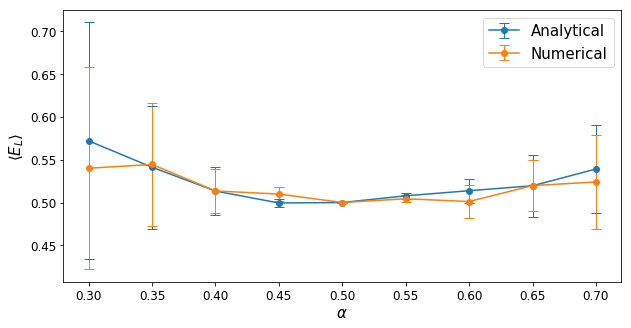

In [44]:
plotstuff(x,y,sigmas,legend)

To do list:
[ ] tables c)
[ ] tables d)
[ ] tables e)